In [1]:
import pandas as pd
import pathlib
from sqlalchemy import create_engine
import numpy as np
from scipy import ndimage
import os

from brainrender import Scene
from vedo import embedWindow, Plotter, show
from itkwidgets import view
from brainrender.actors import Points, ruler
from myterial import salmon_light, blue_grey
from brainrender.video import VideoMaker


ModuleNotFoundError: No module named 'sqlalchemy'

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from matplotlib.patches import Ellipse

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from brainrender import settings
settings.SHOW_AXES = False
settings.WHOLE_SCREEN = False

embedWindow(verbose=True): could not load ipyvtklink try:
> pip install ipyvtklink


In [4]:
import sys
sys.path.append('/Users/corbettb/Documents/scripts/probe_trajectories')
import probe_trajectory_utils as ptu

ModuleNotFoundError: No module named 'probe_trajectory_utils'

In [5]:
structure_tree = pd.read_csv(r'/Volumes/programs/mindscope/workgroups/np-behavior/ccf_structure_tree_2017.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/programs/mindscope/workgroups/np-behavior/ccf_structure_tree_2017.csv'

In [10]:
DB_PATH = pathlib.Path('/Volumes/programs/mindscope/workgroups/dynamicrouting/dynamic_gating_insertions/dr_master.db')

In [11]:
DB = f"sqlite:///{DB_PATH}"
ENGINE = create_engine(DB, echo=False)

NameError: name 'create_engine' is not defined

In [12]:
ENGINE.table_names()

NameError: name 'ENGINE' is not defined

In [8]:
table_name = 'session_metadata'
df_sessions = pd.read_sql_table(table_name, con=ENGINE.connect(), schema=None)

NameError: name 'ENGINE' is not defined

In [9]:
insertions_df = pd.read_sql_table('channel_ccf_coords', con=ENGINE.connect(), schema=None)
hit_rate_df = pd.read_sql_table('hit_region', con=ENGINE.connect(), schema=None)
closest_point_by_insertion_df = pd.read_sql_table('vector_to_region_com', con=ENGINE.connect(), schema=None)
min_distance_by_insertion_df = pd.read_sql_table('min_distance_to_region', con=ENGINE.connect(), schema=None)

NameError: name 'ENGINE' is not defined

In [13]:
for df in [insertions_df, hit_rate_df, closest_point_by_insertion_df, min_distance_by_insertion_df]:
    df.set_index(['Probe', 'Implant', 'Hole', 'Rig', 'MID', 'Day'], inplace=True)
    df.drop(columns='index', inplace=True)

insertions_df.drop(columns='Channel_annotation_file', inplace=True)

In [14]:
def get_lims_id(df_sessions_row):

    session_id = df_sessions_row['session']
    lims_candidate = session_id.split('_')[0]
    if len(lims_candidate)<10:
        lims_id = ''
    else:
        lims_id = lims_candidate
    
    return lims_id


df_sessions['lims_id'] = df_sessions.apply(get_lims_id, axis=1)

In [15]:
passing_dg_sessions = pd.read_csv('/Volumes/programs/mindscope/workgroups/dynamicrouting/dynamic_gating/production_exp_list_080123.csv')
passing_dg_sessions

,Unnamed: 0,lims_id
0,7,1182427414
1,8,1182628226
2,9,1182871514
3,10,1183071525
4,11,1177900858
...,...,...
82,111,1232954220
83,112,1233182785
84,113,1243523806
85,114,1243799530


In [16]:
passing_dg_session_lims_ids = passing_dg_sessions['lims_id'].values
passing_dg_session_lims_ids = [str(p) for p in passing_dg_session_lims_ids]

df_passing_dg_sessions = df_sessions[df_sessions['lims_id'].isin(passing_dg_session_lims_ids)]
df_passing_dg_sessions

,index,session,MID,implant,day,dye,Rig,genotype,ProbeA,ProbeB,ProbeC,ProbeD,ProbeE,ProbeF,annotation_directory,lims_id
7,7,1174553025,608672,football,1,DiI,NP1,sst,F,H,L,K,D,B,//allen/programs/mindscope/workgroups/np-behav...,1174553025
8,8,1174790219,608672,football,2,DiI,NP1,sst,H,M,K,E,D,A,//allen/programs/mindscope/workgroups/np-behav...,1174790219
9,9,1175067685,608672,football,3,DiO,NP1,sst,F,H,L,K,E,B,//allen/programs/mindscope/workgroups/np-behav...,1175067685
10,10,1175253205,608672,football,4,DiO,NP1,sst,H,M,K,E,D,A,//allen/programs/mindscope/workgroups/np-behav...,1175253205
12,12,1176580734,611160,football,2,DiI,NP1,sst,None,G,M,None,B,A,//allen/programs/mindscope/workgroups/np-behav...,1176580734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,1230962048,637488,2002,2,DiI,NP1,sst,A1,B2,D3,D2,E1,F2,//allen/programs/mindscope/workgroups/np-behav...,1230962048
108,108,1231219674,637488,2002,3,mix,NP1,sst,A2,B1,C2,D1,E2,F1,//allen/programs/mindscope/workgroups/np-behav...,1231219674
149,149,1243523806,642504,2002,1,DiI,NP1,sst,A2,B1,C2,None,E2,F1,//allen/programs/mindscope/workgroups/np-behav...,1243523806
150,150,1243799530,642504,2002,2,mix,NP1,sst,A1,B2,C1,None,E1,F2,//allen/programs/mindscope/workgroups/np-behav...,1243799530


In [17]:
insertions_no_index = insertions_df.reset_index()
insertion_pass = np.zeros(len(insertions_df))
count = 0
for ir, row in insertions_no_index.iterrows():

    mid = row['MID']
    day = row['Day']

    insertion_pass[count] = 0
    if int(mid) in df_passing_dg_sessions['MID'].values:

        mid_df = df_passing_dg_sessions[df_passing_dg_sessions['MID']==int(mid)]

        if int(day) in mid_df['day'].values:

            insertion_pass[count] = 1

    count += 1

passing_dg_insertions = insertions_no_index.loc[insertion_pass.astype(bool)].set_index(['Probe', 'Implant', 'Hole', 'Rig', 'MID', 'Day'])

passing_dg_insertions

,,,,,,session,Channel_0_AP,Channel_0_DV,Channel_0_ML,Channel_0_region,Channel_1_AP,Channel_1_DV,Channel_1_ML,Channel_1_region,Channel_2_AP,...,Channel_381_ML,Channel_381_region,Channel_382_AP,Channel_382_DV,Channel_382_ML,Channel_382_region,Channel_383_AP,Channel_383_DV,Channel_383_ML,Channel_383_region
Probe,Implant,Hole,Rig,MID,Day,,,,,,,,,,,,,,,,,,,,,
A,football,F,NP1,608672,1,1174553025,306.0,154.0,202.0,PF,306.0,152.0,202.0,PF,306.0,...,193.0,root,272.0,3.0,193.0,root,272.0,3.0,193.0,root
B,football,H,NP1,608672,1,1174553025,309.0,147.0,191.0,MB,309.0,147.0,191.0,MB,309.0,...,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain
C,football,L,NP1,608672,1,1174553025,335.0,182.0,128.0,CA3,335.0,182.0,128.0,CA3,334.0,...,124.0,root,379.0,20.0,124.0,root,379.0,20.0,124.0,root
D,football,K,NP1,608672,1,1174553025,356.0,170.0,140.0,MB,356.0,170.0,140.0,MB,356.0,...,67.0,root,374.0,29.0,67.0,root,374.0,28.0,67.0,root
E,football,D,NP1,608672,1,1174553025,228.0,172.0,195.0,TH,228.0,172.0,194.0,TH,228.0,...,87.0,root,228.0,27.0,87.0,root,229.0,26.0,87.0,root
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B,2002,B1,NP1,642504,3,1244070169,303.0,128.0,173.0,LP,303.0,127.0,173.0,LP,302.0,...,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain
C,2002,C2,NP1,642504,3,1244070169,298.0,156.0,168.0,PO,298.0,156.0,168.0,PO,298.0,...,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain,-1.0,-1.0,-1.0,out of brain
D,2002,NaN,NP1,642504,3,1244070169,NaN,NaN,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated,NaN,...,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated,NaN,NaN,NaN,Track not annotated


In [18]:
passing_dg_no_nan = passing_dg_insertions.dropna()

In [19]:
passing_dg_traj_counts = passing_dg_no_nan.reset_index().value_counts(['Probe', 'Implant', 'Hole'])
common_trajectories = pd.DataFrame(passing_dg_traj_counts[passing_dg_traj_counts>=8])

In [20]:
import random
random.seed(1)
chars = '0123456789ABCDEF'
random_colors = ['#'+''.join(random.sample(chars,6)) for i in range(len(common_trajectories))]
random_color_codes = [int(c[1:], 16) for c in random_colors]
common_trajectories['color'] = random_color_codes
common_trajectories['color_codes'] = random_colors

In [21]:
common_trajectories

,,,0,color,color_codes
Probe,Implant,Hole,,,
A,TS5,E,17,4840479,#49DC1F
B,TS5,H,16,3657434,#37CEDA
D,TS5,K,16,13578608,#CF3170
E,TS5,F,16,13016839,#C69F07
B,TS5,M,16,9159569,#8BC391
A,TS5,C,15,10546680,#A0EDF8
D,TS5,N,14,944701,#0E6A3D
E,TS5,G,13,539771,#083C7B
C,TS5,O,13,7682783,#753ADF


In [22]:
trajectories_to_analyze = ptu.slice_multiindex_with_list(passing_dg_no_nan, common_trajectories.index.values)
trajectories_to_analyze.dropna(inplace=True)
trajectories_to_analyze

session  Channel_0_AP  Channel_0_DV  \
Probe Implant  Hole Rig MID    Day                                           
C     football L    NP1 608672 1    1174553025         335.0         182.0   
E     football D    NP1 608672 1    1174553025         228.0         172.0   
                               2    1174790219         225.0         152.0   
F     football A    NP1 608672 2    1174790219         169.0         182.0   
C     football L    NP1 608672 3    1175067685         334.0         169.0   
...                                        ...           ...           ...   
A     2002     A1   NP1 642504 2    1243799530         320.0         130.0   
B     2002     B2   NP1 642504 2    1243799530         360.0         144.0   
A     2002     A2   NP1 642504 3    1244070169         212.0         152.0   
B     2002     B1   NP1 642504 3    1244070169         303.0         128.0   
C     2002     C2   NP1 642504 3    1244070169         298.0         156.0   

                                    Channel_0_ML Channel_0_region  \
Probe Implant  Hole Rig MID    Day                                  
C     football L    NP1 608672 1           128.0              CA3   
E     football D    NP1 608672 1           195.0               TH   
                               2           191.0               fi   
F     football A    NP1 608672 2           218.0              LSr   
C     football L    NP1 608672 3           127.0               PP   
...                                          ...              ...   
A     2002     A1   NP1 642504 2           198.0               MB   
B     2002     B2   NP1 642504 2           154.0              MRN   
A     2002     A2   NP1 642504 3           198.0              LSr   
B     2002     B1   NP1 642504 3           173.0               LP   
C     2002     C2   NP1 642504 3           168.0               PO   

                                    Channel_1_AP  Channel_1_DV  Channel_1_ML  \
Probe Implant  Hole Rig MID    Day                                             
C     football L    NP1 608672 1           335.0         182.0         128.0   
E     football D    NP1 608672 1           228.0         172.0         194.0   
                               2           225.0         152.0         191.0   
F     football A    NP1 608672 2           169.0         181.0         218.0   
C     football L    NP1 608672 3           334.0         168.0         125.0   
...                                          ...           ...           ...   
A     2002     A1   NP1 642504 2           320.0         130.0         198.0   
B     2002     B2   NP1 642504 2           360.0         144.0         154.0   
A     2002     A2   NP1 642504 3           212.0         151.0         198.0   
B     2002     B1   NP1 642504 3           303.0         127.0         173.0   
C     2002     C2   NP1 642504 3           298.0         156.0         168.0   

                                   Channel_1_region  Channel_2_AP  ...  \
Probe Implant  Hole Rig MID    Day                                 ...   
C     football L    NP1 608672 1                CA3         334.0  ...   
E     football D    NP1 608672 1                 TH         228.0  ...   
                               2                 fi         225.0  ...   
F     football A    NP1 608672 2                LSr         168.0  ...   
C     football L    NP1 608672 3               root         335.0  ...   
...                                             ...           ...  ...   
A     2002     A1   NP1 642504 2                 MB         320.0  ...   
B     2002     B2   NP1 642504 2                MRN         360.0  ...   
A     2002     A2   NP1 642504 3                LSr         212.0  ...   
B     2002     B1   NP1 642504 3                 LP         302.0  ...   
C     2002     C2   NP1 642504 3                 PO         298.0  ...   

                                    Channel_381_ML  Channel_381_region  \
Probe Implant  Hole Rig MID    Day              

In [23]:
def out_of_brain_trajectory(row):

    region_cols = [c for c in row.index if 'region' in c]
    return np.sum(row[region_cols]=='out of brain')==384


In [24]:
out_of_brain = trajectories_to_analyze.apply(out_of_brain_trajectory, axis=1)
trajectories_to_analyze = trajectories_to_analyze.mask(out_of_brain).dropna()

In [26]:
from probe_trajectory_utils import custom_camera, top_down, camera_2

In [40]:
trajectories_to_analyze

session  Channel_0_AP  Channel_0_DV  \
Probe Implant  Hole Rig MID    Day                                           
C     football L    NP1 608672 1    1174553025         335.0         182.0   
E     football D    NP1 608672 1    1174553025         228.0         172.0   
                               2    1174790219         225.0         152.0   
F     football A    NP1 608672 2    1174790219         169.0         182.0   
C     football L    NP1 608672 3    1175067685         334.0         169.0   
...                                        ...           ...           ...   
A     2002     A1   NP1 642504 2    1243799530         320.0         130.0   
B     2002     B2   NP1 642504 2    1243799530         360.0         144.0   
A     2002     A2   NP1 642504 3    1244070169         212.0         152.0   
B     2002     B1   NP1 642504 3    1244070169         303.0         128.0   
C     2002     C2   NP1 642504 3    1244070169         298.0         156.0   

                                    Channel_0_ML Channel_0_region  \
Probe Implant  Hole Rig MID    Day                                  
C     football L    NP1 608672 1           128.0              CA3   
E     football D    NP1 608672 1           195.0               TH   
                               2           191.0               fi   
F     football A    NP1 608672 2           218.0              LSr   
C     football L    NP1 608672 3           127.0               PP   
...                                          ...              ...   
A     2002     A1   NP1 642504 2           198.0               MB   
B     2002     B2   NP1 642504 2           154.0              MRN   
A     2002     A2   NP1 642504 3           198.0              LSr   
B     2002     B1   NP1 642504 3           173.0               LP   
C     2002     C2   NP1 642504 3           168.0               PO   

                                    Channel_1_AP  Channel_1_DV  Channel_1_ML  \
Probe Implant  Hole Rig MID    Day                                             
C     football L    NP1 608672 1           335.0         182.0         128.0   
E     football D    NP1 608672 1           228.0         172.0         194.0   
                               2           225.0         152.0         191.0   
F     football A    NP1 608672 2           169.0         181.0         218.0   
C     football L    NP1 608672 3           334.0         168.0         125.0   
...                                          ...           ...           ...   
A     2002     A1   NP1 642504 2           320.0         130.0         198.0   
B     2002     B2   NP1 642504 2           360.0         144.0         154.0   
A     2002     A2   NP1 642504 3           212.0         151.0         198.0   
B     2002     B1   NP1 642504 3           303.0         127.0         173.0   
C     2002     C2   NP1 642504 3           298.0         156.0         168.0   

                                   Channel_1_region  Channel_2_AP  ...  \
Probe Implant  Hole Rig MID    Day                                 ...   
C     football L    NP1 608672 1                CA3         334.0  ...   
E     football D    NP1 608672 1                 TH         228.0  ...   
                               2                 fi         225.0  ...   
F     football A    NP1 608672 2                LSr         168.0  ...   
C     football L    NP1 608672 3               root         335.0  ...   
...                                             ...           ...  ...   
A     2002     A1   NP1 642504 2                 MB         320.0  ...   
B     2002     B2   NP1 642504 2                MRN         360.0  ...   
A     2002     A2   NP1 642504 3                LSr         212.0  ...   
B     2002     B1   NP1 642504 3                 LP         302.0  ...   
C     2002     C2   NP1 642504 3                 PO         298.0  ...   

                                    Channel_381_ML  Channel_381_region  \
Probe Implant  Hole Rig MID    Day              

In [110]:
trajectory_mouse_count = []
trajectory_name = []
for it, trajectory in common_trajectories.iterrows():
    trajectory_tracks = trajectories_to_analyze.loc[trajectory.name]
    trajectory_mouse_count.append(trajectory_tracks.index.get_level_values(1).unique().size)
    trajectory_name.append(trajectory.name)


indexing past lexsort depth may impact performance.


In [111]:
trajectories_with_many_mice = np.array(trajectory_name)[np.array(trajectory_mouse_count)>5]
trajectories_with_many_mice = [tuple(t) for t in trajectories_with_many_mice]
trajectories_with_many_mice

[('A', 'TS5', 'E'),
 ('B', 'TS5', 'H'),
 ('D', 'TS5', 'K'),
 ('E', 'TS5', 'F'),
 ('B', 'TS5', 'M'),
 ('A', 'TS5', 'C'),
 ('D', 'TS5', 'N'),
 ('E', 'TS5', 'G'),
 ('C', 'TS5', 'O'),
 ('F', 'TS5', 'A'),
 ('F', 'TS5', 'D'),
 ('B', '2002', 'B1'),
 ('E', '2002', 'E2'),
 ('A', '2002', 'A1'),
 ('B', '2002', 'B2')]

In [112]:
trajectories_to_analyze = ptu.slice_multiindex_with_list(trajectories_to_analyze, trajectories_with_many_mice)

In [113]:
coords = trajectories_to_analyze.apply(ptu.get_channel_coords_from_row, axis=1).to_list()
colors = trajectories_to_analyze.apply(lambda row: common_trajectories.loc[row.name[:3]]['color_codes'], axis=1).to_list()

In [114]:
ptu.plot_still(coords, 
                [],
                camera = top_down,
                track_colors = colors,
                save_root = '/Volumes/programs/mindscope/workgroups/dynamicrouting/dynamic_gating_insertions',
                save_name = 'passing_dg_insertions_only_trajs_with_atleast6mice',
                area_alphas = None,
                point_alpha = 1,
                invert_ml = True,
                )

Saving new screenshot at 
/Volumes/programs/mindscope/workgroups/dynamicrouting/dynamic_gating_insertions/passing_dg_insertions_only_trajs_wi
th_atleast6mice.png

In [27]:
def find_track_brain_entry_point(trajectory_df_row):

    out_of_brain_labels = ['No Area', 'out of brain', 'root']
    area_cols = [col for col in trajectory_df_row.index.values if '_region' in col]
    regions = trajectory_df_row[area_cols].values[::-1]

    brain_surface_ind_r = np.where(~np.isin(regions, out_of_brain_labels))[0][0] + 1
    brain_surface_ind = len(regions) - brain_surface_ind_r

    ccf_cols = [col for col in trajectory_df_row.index.values if 'AP' in col or 'DV' in col or 'ML' in col]
    row_ccf = trajectory_df_row[ccf_cols]

    raw_coords = row_ccf.values
    coords_3d = np.reshape(raw_coords, (384, 3)).astype(float)

    brain_surface_coord = coords_3d[brain_surface_ind]
    return brain_surface_coord, brain_surface_ind, trajectory_df_row[area_cols].values[brain_surface_ind]

In [28]:
trajectory = common_trajectories.iloc[0]
trajectory_tracks = trajectories_to_analyze.loc[trajectory.name]
brain_insertion_coords = trajectory_tracks.apply(find_track_brain_entry_point, axis=1)
brain_insertion_coords


indexing past lexsort depth may impact performance.


Rig  MID     Day
NP1  611166  1      ([218.0, 27.0, 206.0], 322, MOs1)
     615047  2      ([199.0, 33.0, 196.0], 336, MOs1)
             4      ([204.0, 31.0, 201.0], 325, MOs1)
     615563  4      ([196.0, 33.0, 202.0], 316, MOs1)
     615048  2      ([203.0, 32.0, 209.0], 333, MOs1)
             4      ([204.0, 31.0, 201.0], 335, MOs1)
     615564  2      ([213.0, 29.0, 179.0], 379, MOp1)
             4      ([210.0, 29.0, 182.0], 328, MOp1)
     623322  1      ([226.0, 23.0, 192.0], 332, MOp1)
             3      ([224.0, 24.0, 190.0], 366, MOp1)
     623784  1      ([204.0, 32.0, 194.0], 349, MOs1)
             3      ([210.0, 29.0, 190.0], 321, MOp1)
     623319  3      ([208.0, 29.0, 197.0], 371, MOs1)
     623786  1      ([226.0, 24.0, 186.0], 319, MOp1)
             3      ([231.0, 23.0, 190.0], 330, MOp1)
     626279  1      ([228.0, 23.0, 196.0], 292, MOp1)
             3      ([233.0, 21.0, 192.0], 311, MOp1)
dtype: object

In [29]:
traj_brain_surface_coords = [c[0] for c in brain_insertion_coords.values]
traj_brain_surface_coords = np.array(traj_brain_surface_coords)

traj_brain_surface_areas = [c[2] for c in brain_insertion_coords.values]


11.603602829118074
7.804709783822111


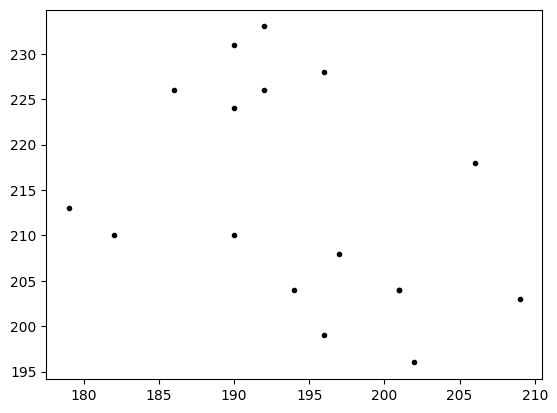

In [30]:
ap = traj_brain_surface_coords[:, 0]
ml = traj_brain_surface_coords[:, 2]

print(np.std(ap))
print(np.std(ml))
plt.plot(ml, ap, 'k.')

In [31]:
def pca(data):
    # data is n samples x m parameters
    eigVal,eigVec = np.linalg.eigh(np.cov(data,rowvar=False))
    order = np.argsort(eigVal)[::-1]
    eigVal = eigVal[order]
    eigVec = eigVec[:,order]
    pcaData = data.dot(eigVec)
    return pcaData,eigVal,eigVec

In [32]:
from scipy.stats import median_abs_deviation

In [101]:
ccf_bregma = np.array([216, 18, 228])*25
ccf_bregma_ap = ccf_bregma[2]
ccf_bregma_ml = ccf_bregma[0]

In [1]:
len(trajectories_with_many_mice)

NameError: name 'trajectories_with_many_mice' is not defined

0
1
2
3
4
5
6
7
8
9
10
11


indexing past lexsort depth may impact performance.


12
13
14
339.7825543924878
212.45504879236393
238.28059881295303
116.94599066450019
150.0
200.0


Text(0, 0.5, 'Anterior-Posterior CCF position (um)')

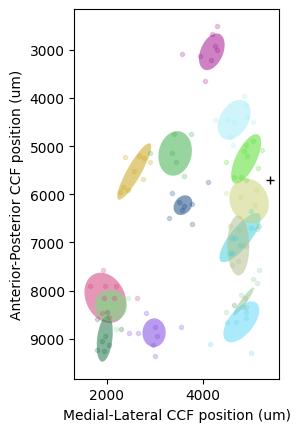

In [105]:
fig, ax = plt.subplots(1,2)
ax.set_aspect('equal')

e1s = []
e2s = []
std1s = []
std2s = []
mad1s = []
mad2s = []
mad_mls = []
mad_aps = []
#for it, trajectory in common_trajectories.iterrows():
for it, trajectory_name in enumerate(trajectories_with_many_mice):
    trajectory = common_trajectories.loc[trajectory_name]
    print(it)
    trajectory_tracks = trajectories_to_analyze.loc[trajectory.name]
    trajectory_tracks = trajectory_tracks.groupby(level='MID').head(1) #Only use one track per mouse
    brain_insertion_coords = trajectory_tracks.apply(find_track_brain_entry_point, axis=1)
    traj_brain_surface_coords = [c[0] for c in brain_insertion_coords.values]
    traj_brain_surface_coords = np.array(traj_brain_surface_coords)

    data = traj_brain_surface_coords[:, (2,0)]*25
    mad_ml = median_abs_deviation(data[:, 0])
    mad_ap = median_abs_deviation(data[:, 1])
    mad_mls.append(mad_ml)
    mad_aps.append(mad_ap)

    pcadata, eigval, eigvec = pca(data)
    e1 = eigvec[:, 0]
    e2 = eigvec[:, 1]
    std1 = eigval[0]**0.5
    std2 = eigval[1]**0.5

    e1s.append(e1)
    e2s.append(e2)
    std1s.append(std1)
    std2s.append(std2)

    mad1 = median_abs_deviation(pcadata[:, 0])
    mad2 = median_abs_deviation(pcadata[:, 1])
    mad1s.append(mad1)
    mad2s.append(mad2)


    data_mean = np.median(data, axis=0)
    ax.plot(data[:, 0], data[:, 1], '.', c=trajectory['color_codes'], alpha=0.2)

    # for e, std in zip([e1, e2], [std1, std2]):
    #     top = data_mean + (e*std)
    #     bottom = data_mean - (e*std)
    #     ax.plot([top[0], bottom[0]], [top[1], bottom[1]])


    ellipse = Ellipse(data_mean,
            width=mad1*4, 
            height=mad2*4,
            angle=np.rad2deg(np.arctan(e1[1]/e1[0])),
            edgecolor='none',
            facecolor=trajectory['color_codes'],
            alpha=0.5)

    ax.add_patch(ellipse)
    #confidence_ellipse(data[:, 0], data[:, 1], ax, n_std=1, edgecolor='r')

ax.plot(ccf_bregma_ml, ccf_bregma_ap, 'k+')

print(np.median(std1s))
print(np.median(std2s))

print(np.median(mad1s))
print(np.median(mad2s))
print(np.median(mad_mls))
print(np.median(mad_aps))
ax.yaxis.set_inverted(True)
ax.set_xlabel('Medial-Lateral CCF position (um)')
ax.set_ylabel('Anterior-Posterior CCF position (um)')

In [60]:
print(data[:, 1])
print(median_abs_deviation(data[:, 1]))


[5725. 5700. 5650. 5800. 5850. 5775. 5350. 5800. 5550.]
75.0


In [61]:
np.argmin(np.array(mad_aps)*np.array(mad_mls))
np.array(mad_aps)*np.array(mad_mls)

array([20000.  , 39375.  , 14218.75, 53437.5 , 32500.  , 18750.  ,
       26562.5 , 43750.  , 18750.  , 15000.  , 80000.  , 48750.  ,
       22500.  , 43750.  ,  1875.  ,  3750.  , 30000.  ,  4687.5 ,
        4687.5 ,  4687.5 , 17500.  , 16250.  ])

In [59]:
trajectory = common_trajectories.iloc[14]
trajectory_tracks = trajectories_to_analyze.loc[trajectory.name]
brain_insertion_coords = trajectory_tracks.apply(find_track_brain_entry_point, axis=1)
traj_brain_surface_coords = [c[0] for c in brain_insertion_coords.values]
traj_brain_surface_coords = np.array(traj_brain_surface_coords)

data = traj_brain_surface_coords[:, (2,0)]*25


indexing past lexsort depth may impact performance.


In [178]:
for ind in range(len(common_trajectories)):

    print(std1s[ind], common_trajectories.iloc[ind].name)

324.98770615499103 ('A', 'TS5', 'E')
332.5258937531756 ('A', 'TS5', 'C')
498.7364547950354 ('D', 'TS5', 'K')
359.95375206266846 ('B', 'TS5', 'M')
374.82491950960514 ('E', 'TS5', 'F')
324.1561093288903 ('B', 'TS5', 'H')
307.85271278371306 ('D', 'TS5', 'N')
323.13084802469814 ('E', 'TS5', 'G')
311.9160301482233 ('C', 'TS5', 'O')
414.06169791192025 ('F', 'TS5', 'A')
253.72945647716554 ('F', 'football', 'A')
509.0652384188201 ('F', 'TS5', 'D')
352.75867032448093 ('E', '2002', 'E2')
307.45592380792004 ('B', 'football', 'G')
357.2671160624879 ('B', '2002', 'B1')
157.02352582876074 ('E', 'football', 'D')
361.93777963831945 ('F', 'TS5', 'B')
325.42543356098844 ('A', '2002', 'A1')
269.7866797097992 ('C', 'football', 'M')
197.59801749433737 ('D', 'football', 'I')
367.4060199209239 ('C', 'TS5', 'P')
299.70067731621987 ('B', '2002', 'B2')
238.78332201043722 ('A', '2002', 'A2')
352.1020387260112 ('C', 'football', 'L')
350.71654323259617 ('F', 'football', 'B')


In [176]:
worst = np.argmax(std1s)
common_trajectories.iloc[worst]

0                    11
color          11451782
color_codes     #AEBD86
Name: (F, TS5, D), dtype: object

In [159]:
np.mean(data[:, 1])

5342.1875

In [155]:
print(eigval[0]**0.5)
print(std1)

np.rad2deg(np.arctan(e1[1]/e1[0]))


324.98770615499103
324.98770615499103


-68.1914077047423

In [125]:
pcadata, eigval, eigvec = pca(traj_brain_surface_coords[:, (2,0)])

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [93]:
import copy

def plot_animation(coords, 
                    areas_to_show,
                    video_frame_func,
                    duration = 2,
                    camera = None,
                    track_colors = None,
                    save_root = '/Volumes/programs/mindscope/workgroups/dynamicrouting/dynamic_gating_insertions',
                    save_name = 'probe_track_animation',
                    ):
    settings.WHOLE_SCREEN = True
    coords = copy.deepcopy(coords)
    scene = Scene()
    for area in areas_to_show:
        scene.add_brain_region(area, hemisphere='left', alpha=0.3)

    for it, probe_track in enumerate(coords):
        probe_track[:, 2] = 456 - probe_track[:, 2]
        track_points = Points(probe_track*25, radius=30, colors = [track_colors[it]]*len(probe_track))
        
        track = scene.add(track_points)

    
    vm = VideoMaker(scene, save_root, save_name,  make_frame_func=video_frame_func)
    vm.make_video(duration=duration, fps=15, render_kwargs = {'camera': camera})


def plot_still(coords, 
                areas_to_show,
                camera = None,
                track_colors = None,
                save_root = '/Volumes/programs/mindscope/workgroups/dynamicrouting/dynamic_gating_insertions',
                save_name = 'screenshot',
                ):
    
    settings.WHOLE_SCREEN = False
    coords = copy.deepcopy(coords)
    scene = Scene()
    for area in areas_to_show:
        scene.add_brain_region(area, hemisphere='left', alpha=0.3)

    for it, probe_track in enumerate(coords):
        probe_track[:, 2] = 456 - probe_track[:, 2]
        track_points = Points(probe_track*25, radius=30, colors = [track_colors[it]]*len(probe_track))
        
        track = scene.add(track_points)

    
    scene.render(camera=camera)
    scene.screenshot(save_name)


In [102]:
coords.shape

(384, 3)

In [101]:
ptu.plot_still([coords/25], ['LGd'], save_name='test_8014.png')

Saving new screenshot at 
/Volumes/programs/mindscope/workgroups/dynamicrouting/dynamic_gating_insertions/test_8014.png

In [21]:
#Remove entries that have nan for the hole id
no_nan_holes = insertions_df.index.get_level_values(2).notnull()
no_missing_data = insertions_df.iloc[no_nan_holes]

#Remove rows without data
no_missing_data = no_missing_data.dropna(axis=0)

In [22]:
no_index = no_missing_data.reset_index()
trajectory_counts = no_index.value_counts(['Probe', 'Implant', 'Hole'])

In [95]:
common_trajectory_counts = pd.DataFrame(trajectory_counts[trajectory_counts>5])

import random
random.seed(1)
chars = '0123456789ABCDEF'
random_colors = ['#'+''.join(random.sample(chars,6)) for i in range(len(common_trajectory_counts))]
random_color_codes = [int(c[1:], 16) for c in random_colors]
common_trajectory_counts['color'] = random_color_codes
common_trajectory_counts['color_codes'] = random_colors

In [24]:
indices = no_missing_data.index.values
indices = [tuple(ind[:3]) for ind in indices]

indices_to_keep = [indind for indind, ind in enumerate(indices) if any(ind == c for c in common_trajectory_counts.index.values)]
common_no_missing = no_missing_data.iloc[indices_to_keep]
common_no_missing

,,,,,,Channel_0_AP,Channel_0_DV,Channel_0_ML,Channel_1_AP,Channel_1_DV,Channel_1_ML,Channel_2_AP,Channel_2_DV,Channel_2_ML,Channel_3_AP,...,Channel_380_ML,Channel_381_AP,Channel_381_DV,Channel_381_ML,Channel_382_AP,Channel_382_DV,Channel_382_ML,Channel_383_AP,Channel_383_DV,Channel_383_ML
Probe,Implant,Hole,Rig,MID,Day,,,,,,,,,,,,,,,,,,,,,
A,football,F,NP1,604914,1,294.0,162.0,184.0,292.0,162.0,184.0,292.0,160.0,184.0,292.0,...,176.0,259.0,6.0,176.0,258.0,5.0,176.0,258.0,5.0,176.0
B,football,H,NP1,604914,1,296.0,144.0,192.0,296.0,144.0,192.0,296.0,144.0,192.0,296.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
C,football,M,NP1,604914,1,310.0,156.0,152.0,310.0,156.0,152.0,310.0,156.0,152.0,311.0,...,130.0,356.0,5.0,130.0,356.0,4.0,130.0,356.0,4.0,130.0
D,football,K,NP1,604914,1,327.0,190.0,127.0,327.0,190.0,126.0,327.0,190.0,126.0,327.0,...,69.0,351.0,55.0,69.0,352.0,54.0,69.0,352.0,54.0,69.0
E,football,E,NP1,604914,1,266.0,154.0,184.0,266.0,155.0,184.0,266.0,155.0,184.0,266.0,...,86.0,260.0,26.0,84.0,260.0,26.0,84.0,260.0,24.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B,2002,B2,NP3,649943,4,344.0,170.0,138.0,344.0,170.0,138.0,344.0,168.0,138.0,344.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
C,2002,D3,NP3,649943,4,325.0,209.0,146.0,325.0,209.0,146.0,326.0,209.0,146.0,326.0,...,105.0,367.0,40.0,105.0,367.0,40.0,104.0,367.0,40.0,104.0
D,2002,D2,NP3,649943,4,354.0,198.0,110.0,354.0,198.0,110.0,354.0,198.0,110.0,354.0,...,33.0,396.0,53.0,34.0,396.0,53.0,34.0,396.0,53.0,32.0


In [127]:
coords = common_no_missing.apply(get_channel_coords_from_row, axis=1).to_list()
colors = common_no_missing.apply(lambda row: common_trajectory_counts.loc[row.name[:3]]['color'], axis=1).to_list()

In [128]:
plot_animation(coords, [], make_frame_function, duration=3, 
               camera=custom_camera, track_colors=colors, save_root='',
               save_name='probe_track_animation2')

Saving video in .

📽  Video probe_track_animation2 is open...


Output()

Saving video

Saved video at: ./probe_track_animation2.mp4

In [117]:
common_trajectory_counts.sort_index(level=0).drop(columns='color').rename(columns={0: 'Insertion Count'})

Insertion Count color_codes
Probe Implant  Hole                             
A     2002     A1                 14     #083C7B
               A2                 12     #64E978
               B3                  7     #40B278
      TS5      C                  13     #AEBD86
               E                  17     #37CEDA
      football C                   6     #430F1B
               F                   6     #E38A06
      templ    A1                  6     #D8F3AE
B     2002     B1                 16     #C69F07
               B2                 12     #C9D073
      TS5      H                  12     #58D6F7
               M                  16     #8BC391
      football G                   7     #EB57C1
               H                   7     #0465D3
      templ    B1                  6     #9E4B26
C     2002     C1                  8     #07FC43
               C2                  9     #58921E
               D3                 10     #6F0759
      TS5      O                  11     #0C38ED
               P                   7     #5A4EBD
      football L                  10     #68F75D
               M                   7     #DF03E6
      templ    C2                  8     #80DA1B
D     2002     D1                 11     #C859D7
               D2                 12     #B17A8E
      TS5      K                  17     #49DC1F
               N                  13     #753ADF
      football I                   6     #AFE604
               K                   7     #814BF3
E     2002     E1                 15     #A0EDF8
               E2                 10     #8AF9B0
      TS5      F                  16     #CF3170
               G                  13     #9E068A
      football D                  11     #07F4B9
               E                   8     #912D48
F     2002     F1                 13     #32AB41
               F2                 15     #0E6A3D
      TS5      A                  11     #CA2D83
               B                   8     #81C925
               D                  12     #C6A258
      football A                  10     #CFDB82
               B                   9     #A7903F
      templ    F2                  9     #B08D9F

In [39]:
common_no_missing.index.get_level_values(1).unique()

Index(['football', 'TS5', '2002', 'templ'], dtype='object', name='Implant')

In [37]:
common_no_missing.loc[pd.IndexSlice[:, 'templ'], :]

,,,,,,Channel_0_AP,Channel_0_DV,Channel_0_ML,Channel_1_AP,Channel_1_DV,Channel_1_ML,Channel_2_AP,Channel_2_DV,Channel_2_ML,Channel_3_AP,...,Channel_380_ML,Channel_381_AP,Channel_381_DV,Channel_381_ML,Channel_382_AP,Channel_382_DV,Channel_382_ML,Channel_383_AP,Channel_383_DV,Channel_383_ML
Probe,Implant,Hole,Rig,MID,Day,,,,,,,,,,,,,,,,,,,,,
A,templ,A1,NP3,628801,1,297.0,144.0,168.0,297.0,144.0,168.0,297.0,143.0,168.0,297.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
C,templ,C2,NP3,628801,1,320.0,190.0,82.0,320.0,190.0,82.0,320.0,190.0,82.0,320.0,...,58.0,343.0,32.0,58.0,343.0,32.0,58.0,343.0,32.0,58.0
A,templ,A1,NP3,636397,1,284.0,139.0,182.0,284.0,139.0,182.0,284.0,139.0,182.0,282.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
C,templ,C2,NP3,636397,1,312.0,176.0,80.0,312.0,176.0,80.0,312.0,174.0,80.0,312.0,...,57.0,332.0,18.0,57.0,332.0,18.0,57.0,332.0,18.0,57.0
F,templ,F2,NP3,636397,1,194.0,197.0,186.0,194.0,197.0,185.0,194.0,197.0,185.0,194.0,...,137.0,127.0,58.0,137.0,127.0,58.0,137.0,126.0,58.0,138.0
B,templ,B1,NP3,636397,2,314.0,107.0,122.0,312.0,107.0,122.0,312.0,106.0,122.0,312.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
A,templ,A1,NP3,644547,1,282.0,120.0,188.0,280.0,120.0,188.0,280.0,120.0,188.0,281.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
C,templ,C2,NP3,644547,1,344.0,164.0,73.0,344.0,162.0,73.0,344.0,162.0,73.0,344.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
B,templ,B1,NP3,644547,2,324.0,152.0,125.0,324.0,151.0,125.0,324.0,151.0,125.0,324.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [38]:
num_insertions = len(common_no_missing)
num_mice = common_no_missing.index.get_level_values(4).unique().size
num_trajectories = len(common_no_missing.value_counts(['Probe', 'Implant', 'Hole']))

print(f'{num_insertions} insertions from {num_mice} mice, covering {num_trajectories} unique trajectories')

453 insertions from 31 mice, covering 43 unique trajectories


In [111]:
common_no_missing.loc['B', 'football', 'G']

indexing past lexsort depth may impact performance.


Channel_0_AP  Channel_0_DV  Channel_0_ML  Channel_1_AP  \
Rig MID    Day                                                           
NP1 604914 4           284.0         188.0         114.0         284.0   
    608671 2           306.0         178.0         122.0         306.0   
           3           312.0         158.0         143.0         312.0   
           4           311.0         161.0         124.0         312.0   
    612090 2           276.0         166.0         126.0         276.0   
    607660 2           295.0         169.0         125.0         295.0   
           4           293.0         160.0         122.0         293.0   

                Channel_1_DV  Channel_1_ML  Channel_2_AP  Channel_2_DV  \
Rig MID    Day                                                           
NP1 604914 4           188.0         115.0         285.0         187.0   
    608671 2           178.0         122.0         306.0         178.0   
           3           158.0         143.0         312.0         158.0   
           4           160.0         125.0         312.0         160.0   
    612090 2           164.0         126.0         276.0         164.0   
    607660 2           169.0         125.0         296.0         168.0   
           4           158.0         122.0         293.0         158.0   

                Channel_2_ML  Channel_3_AP  ...  Channel_380_ML  \
Rig MID    Day                              ...                   
NP1 604914 4           114.0         285.0  ...           108.0   
    608671 2           122.0         306.0  ...           138.0   
           3           143.0         312.0  ...           136.0   
           4           125.0         312.0  ...            -1.0   
    612090 2           126.0         276.0  ...            -1.0   
    607660 2           125.0         296.0  ...           136.0   
           4           122.0         293.0  ...            -1.0   

                Channel_381_AP  Channel_381_DV  Channel_381_ML  \
Rig MID    Day                                                   
NP1 604914 4             294.0             5.0           108.0   
    608671 2             316.0            15.0           140.0   
           3             301.0             7.0           136.0   
           4              -1.0            -1.0            -1.0   
    612090 2              -1.0            -1.0            -1.0   
    607660 2             317.0             3.0           136.0   
           4              -1.0            -1.0            -1.0   

                Channel_382_AP  Channel_382_DV  Channel_382_ML  \
Rig MID    Day                                                   
NP1 604914 4             294.0             5.0           108.0   
    608671 2             316.0            15.0           140.0   
           3             301.0             7.0           136.0   
           4              -1.0            -1.0            -1.0   
    612090 2              -1.0            -1.0            -1.0   
    607660 2             317.0             3.0           136.0   
           4              -1.0            -1.0            -1.0   

                Channel_383_AP  Channel_383_DV  Channel_383_ML  
Rig MID    Day                                                  
NP1 604914 4             294.0             4.0           107.0  
    608671 2             317.0            14.0           139.0  
           3             302.0             6.0           136.0  
           4              -1.0            -1.0            -1.0  
    612090 2              -1.0            -1.0            -1.0  
    607660 2             317.0             3.0           136.0  
           4              -1.0            -1.0            -1.0  

[7 rows x 1152 columns]

In [107]:
trajectory_counts = no_missing_data.value_counts(['Probe', 'Implant', 'Hole'])

In [110]:
trajectory_counts['B', 'football']

Hole
H    7
G    7
F    2
M    2
dtype: int64

In [ ]:
min_distance = pd.read_csv('median_min_distance.csv')

In [ ]:
area_of_interest = 'LGd'
min_dist_to_area = min_distance[area_of_interest]
closest_trajectories = 

In [49]:
scene = plot_still(coords[:2], [], make_frame_function, duration=3, 
               camera=custom_camera, track_colors=colors[:2])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [102]:
a_trajectories = common_no_missing.loc['A']
coords = a_trajectories.apply(get_channel_coords_from_row, axis=1).to_list()
colors = a_trajectories.apply(lambda row: common_trajectory_counts.loc['A', row.name[0], row.name[1]]['color'], axis=1).to_list()


In [103]:
plot_still(coords, [], make_frame_function, duration=3, 
               camera=custom_camera, track_colors=colors, save_name='A_trajectories')

Saving new screenshot at A_trajectories.png

In [96]:
a_traj_names = common_no_missing.loc['A'].reindex().value_counts(['Implant', 'Hole']).index.values
for name in a_traj_names:
    color = common_trajectory_counts.loc['A', name[0], name[1]]['color_codes']
    print(f'{name}: {color}')

('TS5', 'E'): #37CEDA
('2002', 'A1'): #083C7B
('TS5', 'C'): #AEBD86
('2002', 'A2'): #64E978
('2002', 'B3'): #40B278
('football', 'C'): #430F1B
('football', 'F'): #E38A06
('templ', 'A1'): #D8F3AE


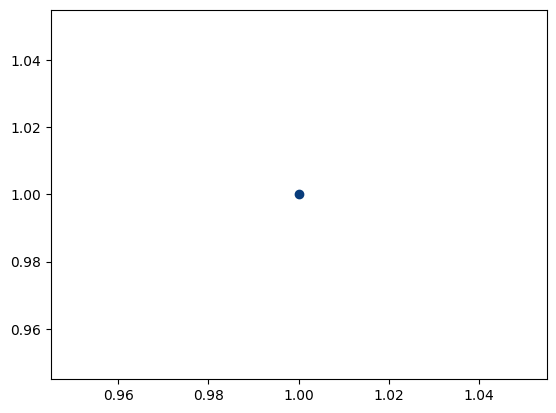

In [98]:
from matplotlib import pyplot as plt

plt.plot(1,1,'o', color = '#083C7B')


In [88]:
str(hex(3657434)).replace('0x', '#')

'#37ceda'

In [94]:
int(color, 16)

TypeError: int() can't convert non-string with explicit base

In [125]:
all_coords = []
all_colors = []
for traj in (('A', '2002', 'A2'), ('B', 'football', 'G')):
    coords = get_coords_for_trajectory(common_no_missing, *traj)
    colors = get_color_for_trajectory(common_no_missing, common_trajectory_counts, *traj)
    
    all_coords.extend(coords)
    all_colors.extend(colors)

indexing past lexsort depth may impact performance.
indexing past lexsort depth may impact performance.


In [126]:
plot_still(all_coords, [], make_frame_function, duration=3, 
               camera=custom_camera, track_colors=all_colors, save_name='AB_trajectories')

Saving new screenshot at AB_trajectories.png

In [141]:
mindistance_traj_grouped = min_distance_by_insertion_df.groupby(level=[0,1,2]).mean()

In [149]:
closest_trajectories = mindistance_traj_grouped.idxmin(axis=0)

In [151]:
closest_trajectories['LGd']

('B', 'TS5', 'J')

In [152]:
trajectory_counts['B', 'TS5', 'J']

1

In [153]:
common_trajectory_counts

0     color color_codes
Probe Implant  Hole                          
D     TS5      K     17   4840479     #49DC1F
A     TS5      E     17   3657434     #37CEDA
E     TS5      F     16  13578608     #CF3170
B     2002     B1    16  13016839     #C69F07
      TS5      M     16   9159569     #8BC391
E     2002     E1    15  10546680     #A0EDF8
F     2002     F2    15    944701     #0E6A3D
A     2002     A1    14    539771     #083C7B
D     TS5      N     13   7682783     #753ADF
E     TS5      G     13  10356362     #9E068A
F     2002     F1    13   3320641     #32AB41
A     TS5      C     13  11451782     #AEBD86
      2002     A2    12   6613368     #64E978
B     2002     B2    12  13226099     #C9D073
F     TS5      D     12  13017688     #C6A258
D     2002     D2    12  11631246     #B17A8E
B     TS5      H     12   5822199     #58D6F7
E     football D     11    521401     #07F4B9
F     TS5      A     11  13249923     #CA2D83
C     TS5      O     11    801005     #0C38ED
D     2002     D1    11  13130199     #C859D7
E     2002     E2    10   9107888     #8AF9B0
F     football A     10  13622146     #CFDB82
C     2002     D3    10   7276377     #6F0759
      football L     10   6879069     #68F75D
F     templ    F2     9  11570591     #B08D9F
      football B      9  10981439     #A7903F
C     2002     C2     9   5804574     #58921E
      templ    C2     8   8444443     #80DA1B
      2002     C1     8    523331     #07FC43
F     TS5      B      8   8505637     #81C925
E     football E      8   9514312     #912D48
C     TS5      P      7   5918397     #5A4EBD
B     football G      7  15423425     #EB57C1
               H      7    288211     #0465D3
D     football K      7   8473587     #814BF3
C     football M      7  14615526     #DF03E6
A     2002     B3     7   4239992     #40B278
      templ    A1     6  14218158     #D8F3AE
      football F      6  14912006     #E38A06
D     football I      6  11527684     #AFE604
A     football C      6   4394779     #430F1B
B     templ    B1     6  10373926     #9E4B26

In [156]:
common_indices = common_trajectory_counts.index.values

In [159]:
common_indices

array([('D', 'TS5', 'K'), ('A', 'TS5', 'E'), ('E', 'TS5', 'F'),
       ('B', '2002', 'B1'), ('B', 'TS5', 'M'), ('E', '2002', 'E1'),
       ('F', '2002', 'F2'), ('A', '2002', 'A1'), ('D', 'TS5', 'N'),
       ('E', 'TS5', 'G'), ('F', '2002', 'F1'), ('A', 'TS5', 'C'),
       ('A', '2002', 'A2'), ('B', '2002', 'B2'), ('F', 'TS5', 'D'),
       ('D', '2002', 'D2'), ('B', 'TS5', 'H'), ('E', 'football', 'D'),
       ('F', 'TS5', 'A'), ('C', 'TS5', 'O'), ('D', '2002', 'D1'),
       ('E', '2002', 'E2'), ('F', 'football', 'A'), ('C', '2002', 'D3'),
       ('C', 'football', 'L'), ('F', 'templ', 'F2'),
       ('F', 'football', 'B'), ('C', '2002', 'C2'), ('C', 'templ', 'C2'),
       ('C', '2002', 'C1'), ('F', 'TS5', 'B'), ('E', 'football', 'E'),
       ('C', 'TS5', 'P'), ('B', 'football', 'G'), ('B', 'football', 'H'),
       ('D', 'football', 'K'), ('C', 'football', 'M'),
       ('A', '2002', 'B3'), ('A', 'templ', 'A1'), ('A', 'football', 'F'),
       ('D', 'football', 'I'), ('A', 'football', 'C'),


In [188]:
min_distance_common = slice_multiindex_with_list(min_distance_by_insertion_df, common_indices)
mindistance_traj_grouped = min_distance_common.groupby(level=[0,1,2]).mean()
closest_trajectories = mindistance_traj_grouped.idxmin(axis=0)

In [195]:
closest_trajectories['MD']

('A', 'TS5', 'E')

In [193]:
coords = get_coords_for_trajectory(common_no_missing, *closest_trajectories['MD'])
colors = get_color_for_trajectory(common_no_missing, common_trajectory_counts, *closest_trajectories['MD'])

indexing past lexsort depth may impact performance.
indexing past lexsort depth may impact performance.


In [191]:
plot_still(coords, ['LGd'], make_frame_function, duration=3,  
               camera=custom_camera, track_colors=colors, save_name='LGN_trajectories')

Saving new screenshot at LGN_trajectories.png

In [194]:
plot_animation(coords, ['MD'], make_frame_function, duration=3, 
               camera=custom_camera, track_colors=colors, save_root='',
               save_name='MD_tracks')

Saving video in .

📽  Video MD_tracks is open...


Output()

Saving video

Saved video at: ./MD_tracks.mp4

In [ ]:
df_sessions